# Camera Callibration

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

%matplotlib inline

In [2]:
def calibrator(calibration_files):
            
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(calibration_files)

    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
#             img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#             cv2.imshow('img',img)
#             cv2.waitKey(500)

#     cv2.destroyAllWindows()
    # Calibrate a camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                       imgpoints, 
                                                       img.shape[0:2],
                                                       None, None)
    print('Calibrator Done')
    return mtx, dist

In [3]:
# Run this calibrator
mtx, dist = calibrator('./camera_cal/calibration*.jpg')

Calibrator Done


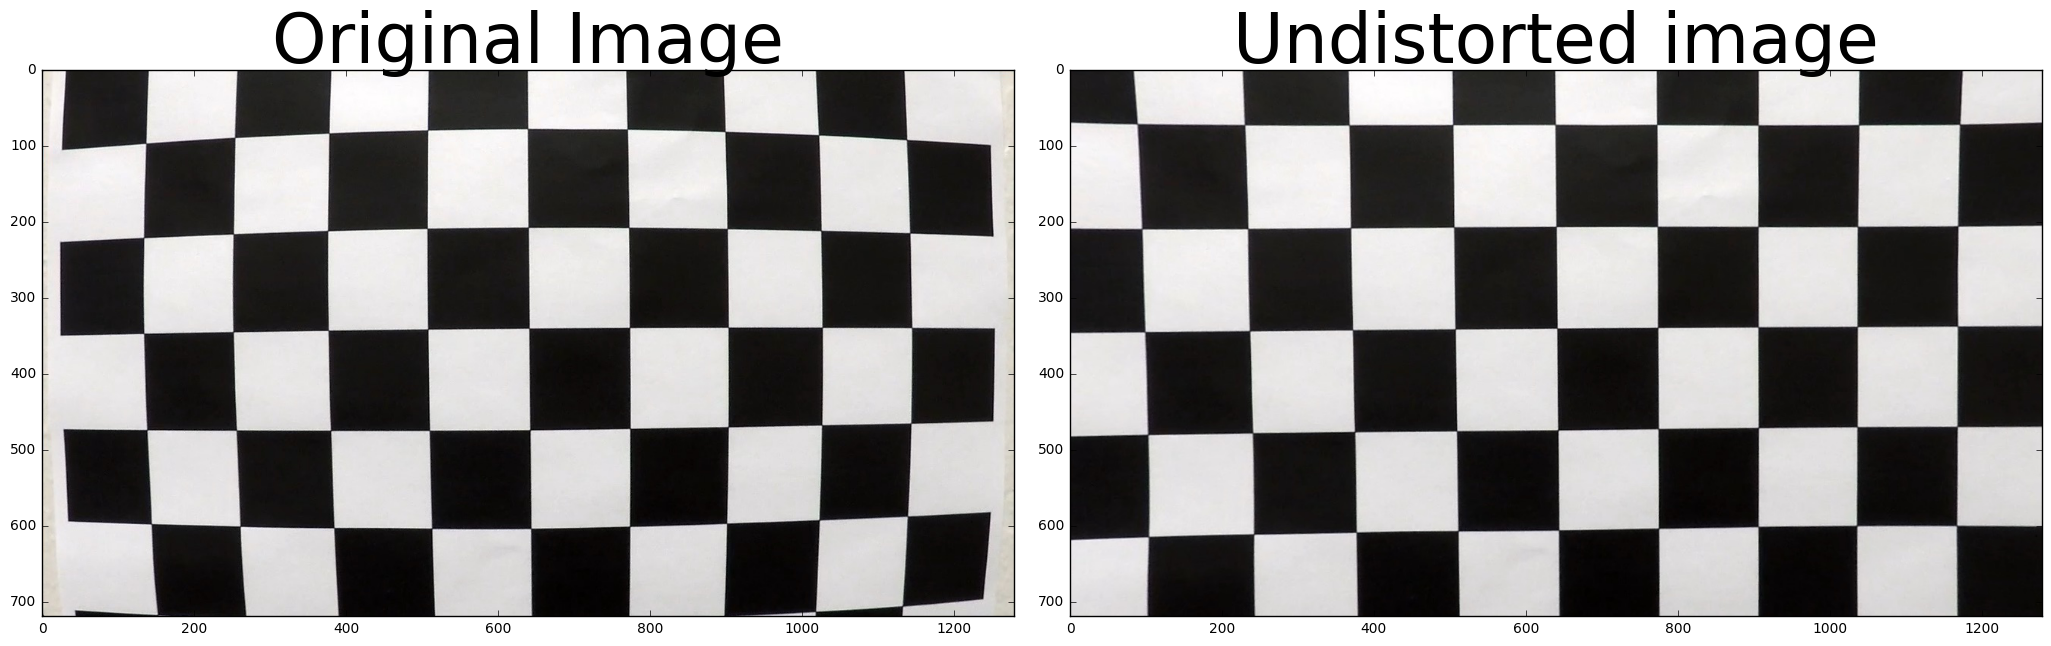

In [4]:
# Undistort image
img = mpimg.imread('./camera_cal/calibration1.jpg')

dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.tight_layout()
ax1.set_title('Original Image', fontsize=50)
ax1.imshow(img)
ax2.set_title('Undistorted image', fontsize=50)
ax2.imshow(dst)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Save

In [ ]:
# Save the calibration parameters
calibration_pickle = {}
calibration_pickle['mtx'] = mtx
calibration_pickle['dist'] = dist
pickle.dump( calibration_pickle, open('./calibration_pickle.p', 'wb') )